# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [28]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [29]:
# 1. Print the number of duplicate rows we have in our dataframe.
# df.duplicate returns an array of booleans 
df.duplicated().sum()

720

In [30]:
#  2. Modify our df to have all duplicate rows removed. 
print(df.shape)
df = df.drop_duplicates()

(11914, 15)


In [31]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.shape

(11194, 15)

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [32]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum().sort_values(ascending=False)

Engine HP            69
Engine Cylinders     30
Number of Doors       6
Engine Fuel Type      3
Make                  0
Model                 0
Year                  0
Transmission Type     0
Driven_Wheels         0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [33]:
# * Print how long our dataframe is.

df.shape

(11194, 15)

In [34]:
# * Remove any row that has a null value in it. 

df = df.dropna()


In [35]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

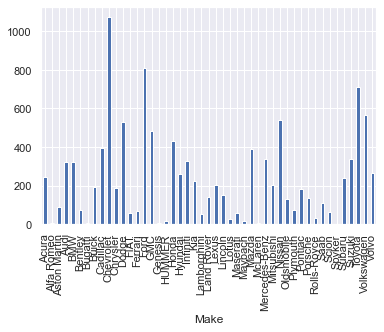

In [39]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

gb_brand = df.groupby('Make')
df_brand = gb_brand['Model'].count()
brand_plot = df_brand.plot(kind='bar')

# three lines above is the same as
# df['Make'].value_counts().plot(kind='bar')

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

Text(0.5, 1.0, 'Number of cars from each brand')

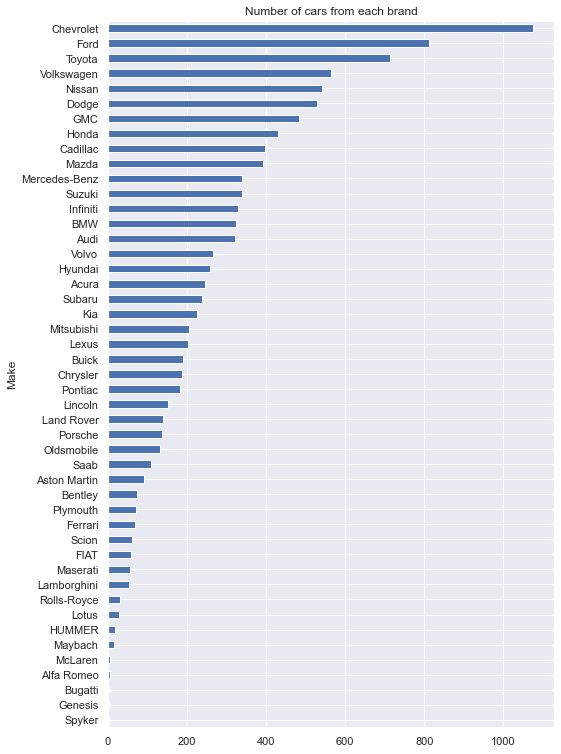

In [40]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

# sort values, make bar chart horizontal, add figsize
brand_plot = df_brand.sort_values().plot(kind='barh', figsize = (8,13))

# set title to chart
brand_plot.set_title("Number of cars from each brand")



# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP of all cars for that year.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

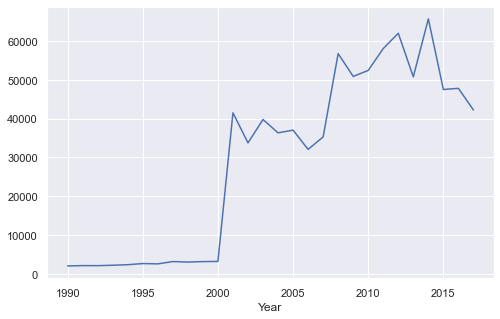

In [41]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

# group by year since we're interested in average of all car prices for each year
price_gb = df.groupby('Year')
# take the mean price of all cars in each year
price_df = price_gb['MSRP'].mean()

# plot
price_df.plot(x = 'Year', y = 'MSRP', figsize=(8,5))

# It seems as though in the years before (and including) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [42]:
# Make a column where is 10 when year is less than 2000, else 1.

year_con = df['Year'] <= 2000

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = np.where(year_con, df['MSRP']*10, df['MSRP'])

# make new adjusted price df using groupby 
adjusted_price_df = df.groupby('Year')['adjusted_price'].mean()

adjusted_price_df.head()

Year
1990    20322.727273
1991    21201.960784
1992    21083.464567
1993    22114.968553
1994    23493.281250
Name: adjusted_price, dtype: float64

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

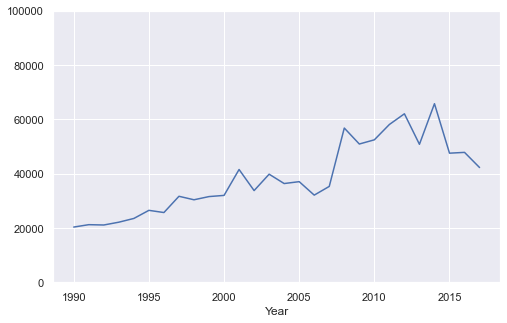

In [43]:
# Plot new prices
adjusted_price_df.plot(x = 'Year', y = 'adjusted_price', figsize=(8,5), ylim=(0,100000))

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [44]:
# What are the top 5 car makers make the most expensive cars on average. 

# create a groupby object based on brand name
gb_makers = df.groupby('Make')

#create a dataframe based on the average of adjusted price from each brand
df_average_price = gb_makers['adjusted_price'].mean()

# display the 5 most expensive brands
df_average_price.sort_values(ascending=False).round().head()


Make
Bugatti        1757224.0
Maybach         546222.0
Rolls-Royce     351131.0
Lamborghini     331567.0
Bentley         247169.0
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [45]:
# Which car makers have the highest median highway MPG?

# crate a dataframe based on the median of highway miles per gallon from brand gourpby object
df_median_MPG = gb_makers['highway MPG'].median()

# display top 5 brands using nlargest method
df_median_MPG.nlargest(5)


Make
Alfa Romeo    34.0
FIAT          33.0
Honda         32.0
Scion         32.0
Volkswagen    32.0
Name: highway MPG, dtype: float64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

<AxesSubplot:xlabel='adjusted_price', ylabel='Count'>

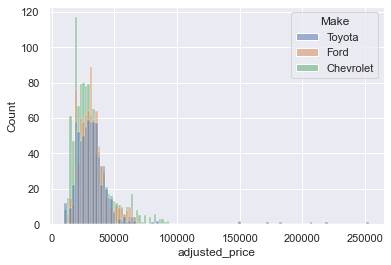

In [46]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

car_brands = ['Chevrolet', 'Ford', 'Toyota']
make_con = df['Make'].isin(car_brands) 

temp_df = df[make_con]
sns.histplot(temp_df, x='adjusted_price', hue='Make')

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

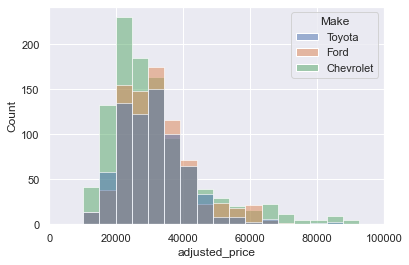

In [47]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
plot_1 = sns.histplot(temp_df, x='adjusted_price', hue='Make', bins = 50)

# setting limit to x <= 100000 to omit outliers from being viewed
plot_1.set_xlim(0,100000)

# Plot the relationship between Engine HP and highway MPG

<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

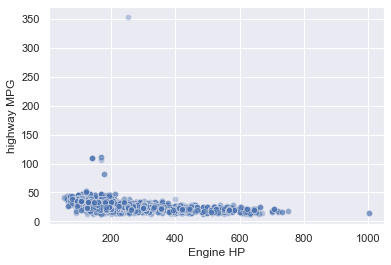

In [48]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data = df, x='Engine HP', y='highway MPG', alpha=0.33)

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

<AxesSubplot:xlabel='Engine HP'>

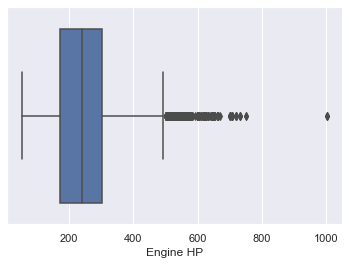

In [49]:
# create a boxplot for the 'Engine HP'
sns.boxplot(data = df, x='Engine HP')

# Make another boxplot for highway MPG

<AxesSubplot:xlabel='highway MPG'>

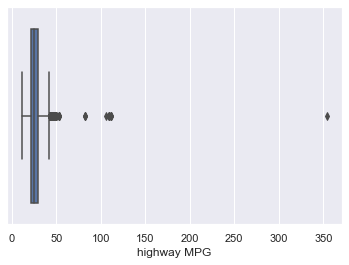

In [50]:
# create a boxplot for the 'highway MPG'
sns.boxplot(data = df, x='highway MPG')

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [63]:
# Remove any  outliers from Engine HP and highway MPG 

def filterOutliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    outliers_below = df[column_name] < (Q1 - 1.5 * IQR)
    outliers_above = df[column_name] > (Q3 + 1.5 * IQR)
    
    return df[~(outliers_below | outliers_above)]

df = filterOutliers(df, 'Engine HP')
df = filterOutliers(df, 'highway MPG')


# Remake the boxplots for both Engine HP and highway MPG


<AxesSubplot:xlabel='Engine HP'>

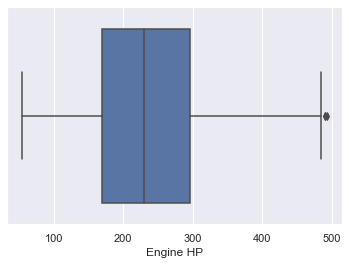

In [64]:
# Engine HP boxplot
sns.boxplot(data = df, x='Engine HP')

<AxesSubplot:xlabel='highway MPG'>

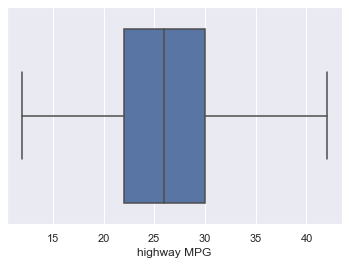

In [65]:
# highway MPG boxplot
sns.boxplot(data = df, x='highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

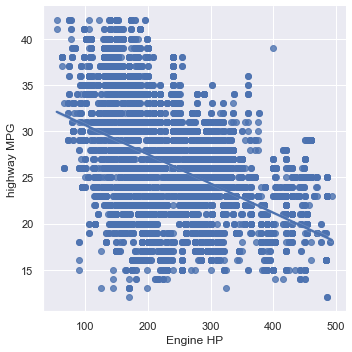

In [66]:
# Make a scatter plot of Engine HP vs highway MPG
sns.lmplot(data = df, x='Engine HP', y='highway MPG')


# What does this plot tell you about how Engine HP affects highway MPG?

In [206]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('High engine horse power slightly implies less highway miles per gallon.')

High engine horse power slightly implies less highway miles per gallon.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

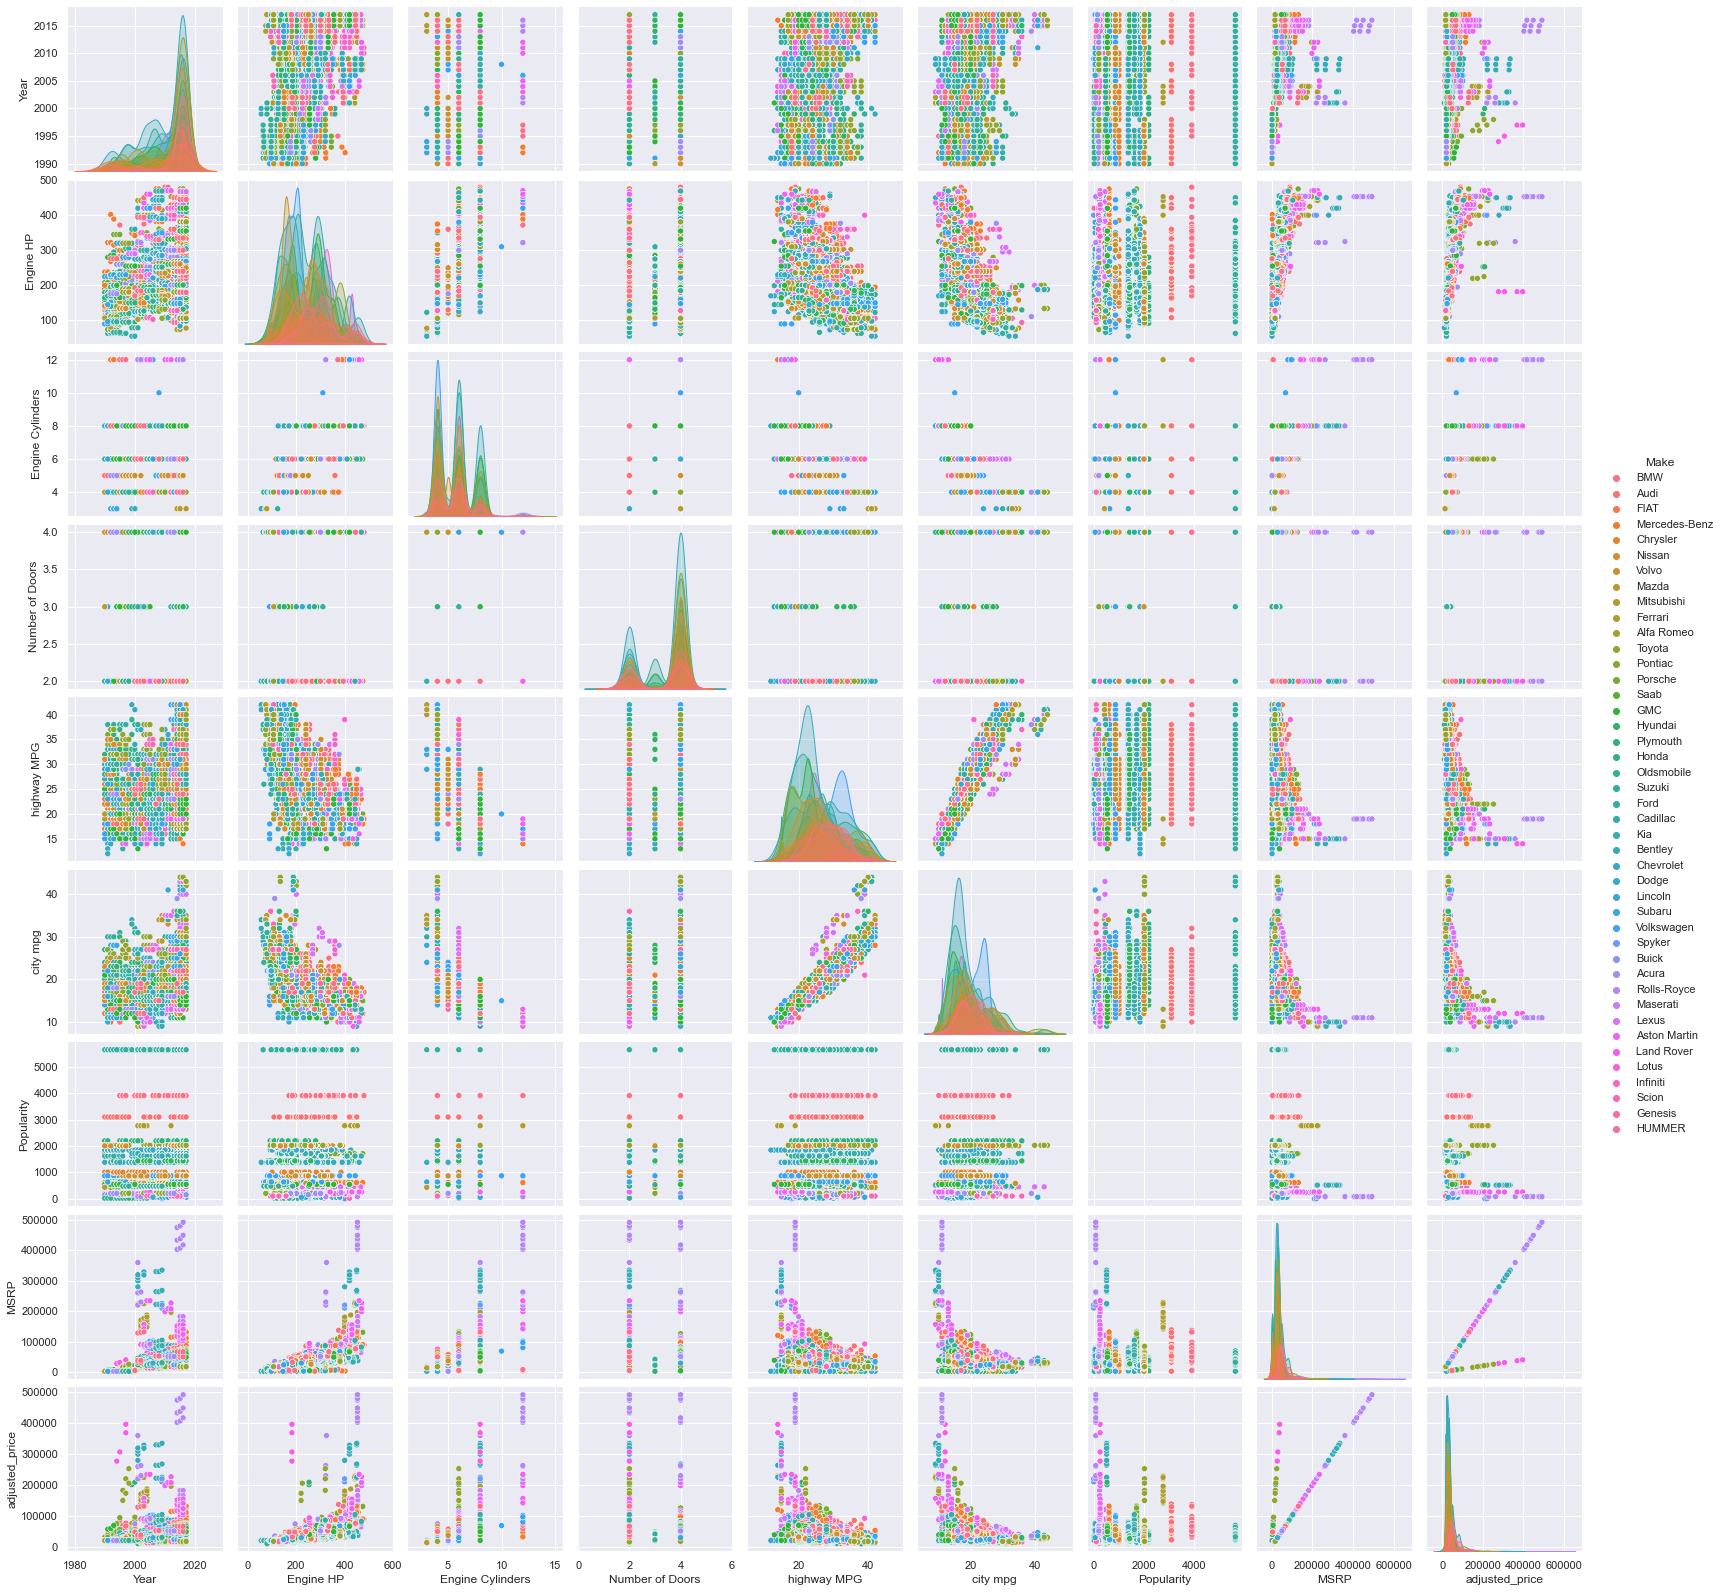

In [254]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(data=df, hue='Make')


In [251]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print('city mpg and highway MPG have the strongest lienar relationship.')

city mpg and highway MPG have the strongest lienar relationship.


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

<AxesSubplot:>

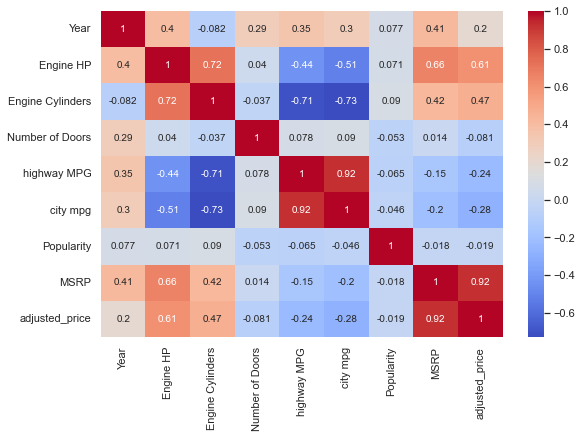

In [211]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


In [264]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP have the strongest relationship with Engine Cylinders')
print("This is because the more cylinders an engine has, the more power it's able to generate. Hence Engine HP (Horse Power)")

Engine HP have the strongest relationship with Engine Cylinders
This is because the more cylinders an engine has, the more power it's able to generate. Hence Engine HP (Horse Power)


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [277]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


# replacing space in column names with underscore 
df.columns = df.columns.str.replace(' ', '_')
# replacing all characters in column names with lowercase characters
df.columns = df.columns.str.lower()

df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
